### Touches within 2mm virtual button

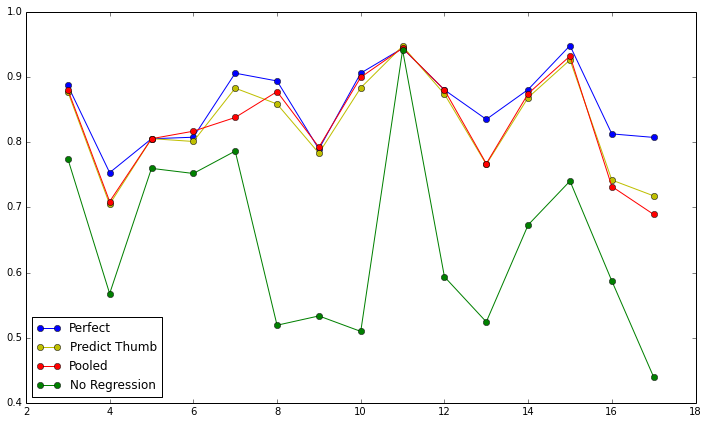

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

def readFile(filename, col_no=1):
    with open(filename) as f:
        lines = f.read().splitlines()
        lines = map(lambda x: float(x.split('\t')[col_no]), lines)
        
    return lines


pooled = readFile("pooled.txt", 2)
perfect = readFile("perfect.txt")
original = readFile("pooled.txt")
predict = readFile("predict.txt")

fig = plt.figure(figsize=(12, 7))

plt.errorbar(range(3,18), perfect, marker='o', color = 'b', label='Perfect')
plt.errorbar(range(3,18), predict, marker='o', color = 'y', label='Predict Thumb')
plt.errorbar(range(3,18), pooled, marker='o', color='r', label='Pooled')
plt.errorbar(range(3,18), original, marker='o', color ='g', label='No Regression')

plt.legend(loc=0)
plt.show()